In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from joblib import Parallel

from useful_func import *

import CSLtools.CSLtools as CSLtools

from skimage.transform import rescale, resize, downscale_local_mean
import skimage
from scipy.ndimage import binary_erosion


import tifffile as tiff
from tqdm import tqdm

sigma_480 = 198 #m2/mol
sigma_405 = 415 #m2/mol
tau_relax = 0.014

import click


import incense
from incense import ExperimentLoader

#source: incense github page

def get_mongo_uri():
    in_devcontainer = (
        os.environ.get("TERM_PROGRAM") == "vscode"
        or os.environ.get("HOME") == "/home/vscode"
        or (os.environ.get("PATH") or "").startswith("/home/vscode")
    )
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None



loader = ExperimentLoader(
    mongo_uri=get_mongo_uri(), 
    db_name='sacred'
)

#%matplotlib widget

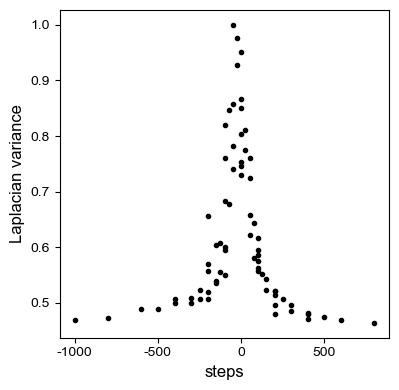

In [5]:
for idi in [567]:#[160]:
    exp = loader.find_by_id(idi)
    df = exp.metrics['blur']
    x, y = df.index.values, df.values
    fig = CSLtools.set_figure("%d", "%0.1f")
    plt.plot(x[10:], y[10:]/y.max(), '.k')

    plt.xlabel("steps")
    plt.ylabel("Laplacian variance")
plt.savefig("results/autofocus")

In [14]:
exp = loader.find_by_name("autofocus")
for ex in exp:
    print(ex.id, ex.metrics)

28 {}
29 {}
30 {}
31 {}
32 {}
33 {}
34 {}
35 {}
36 {}
37 {}
38 {}
39 {}
40 {}
41 {}
42 {}
43 {}
44 {}
45 {}
46 {}
47 {}
48 {}
49 {}
50 {}
51 {}
52 {}
53 {}
54 {}
55 {}
56 {}
57 {}
58 {}
59 {}
60 {}
61 {'blur': step
-400    222.509500
-300    223.103417
-200    222.622380
-100    222.522425
 0      222.181432
 100    223.087125
 200    223.355135
 300    225.486281
 400    225.225818
 500    225.095493
-200    230.276307
-150    230.624984
-100    230.673641
-50     230.261010
 0      231.659686
 50     231.710240
 100    232.289248
 150    231.710243
 200    230.745072
 250    230.969011
Name: blur, dtype: float64}
62 {'blur': step
-400    239.818554
-300    239.185686
-200    238.345324
-100    236.191744
 0      236.768005
 100    234.596469
 200    236.020692
 300    236.975082
 400    236.080674
 500    237.106583
-200    232.533672
-150    233.518658
-100    232.926412
-50     232.450171
 0      231.356411
 50     231.799103
 100    237.031862
 150    237.874562
 200    235.106405

Text(0, 0.5, 'average of image difference')

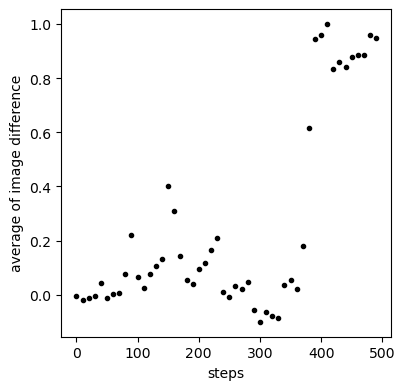